# Describe Epi and Seq dat together in plots
1. Sampling

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
#Dataframe of sequenced data
df_seq = pd.read_csv('/Users/MiladM-Dev/Documents/1PhD/project-1-N450/project-1.1-gendata/results.t/extracted-seq-xsl/de_filtered.csv')
df_seq['EingangsDatum'] = pd.to_datetime(df_seq['EingangsDatum'], format='%Y-%m-%d')
df_seq['EingangsDatum_year'] = df_seq['EingangsDatum'].dt.year
df_seq['EingangsDatum_month'] = df_seq['EingangsDatum'].dt.month
# Count the number of cases per year
case_counts_seq_year = df_seq.groupby('EingangsDatum_year').size()
# Count the number of cases per month
case_counts_seq_month = df_seq.groupby('EingangsDatum_month').size()



# Dataframe of epidemiological data
df_epi = pd.read_csv("/Users/MiladM-Dev/Documents/1PhD/project-1-N450/project-1.2-epidata/msv_zkiph2_2025-03-03_header.csv", sep=";", low_memory=False)
df_epi['ReportingDate'] = df_epi['ReportingDate'].astype(str)
df_epi['ReportingDate'] = pd.to_datetime(df_epi['ReportingDate'], format='mixed', errors='coerce')
df_epi['ReportingDate'] = pd.to_datetime(df_epi['ReportingDate'], format='%Y-%m-%d')
df_epi['ReportingDate_year'] = df_epi['ReportingDate'].dt.year
df_epi['ReportingDate_month'] = df_epi['ReportingDate'].dt.month
# Count the number of cases per year
case_counts_epi_year = df_epi.groupby('ReportingDate_year').size()
# Count the number of cases per month
case_counts_epi_month = df_epi.groupby('ReportingDate_month').size()

## Figure to show cases no vs sequenced number

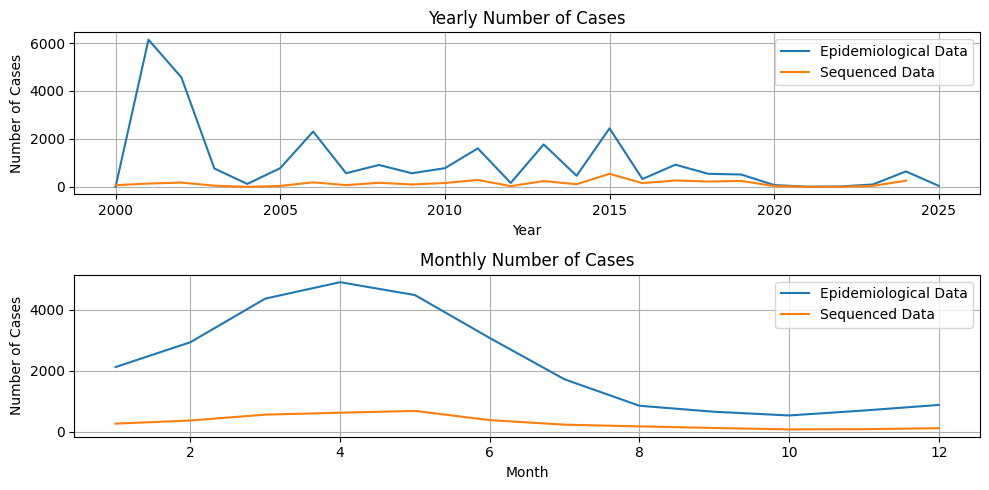

In [3]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5))

# Plot yearly case counts
axes[0].plot(case_counts_epi_year.index, case_counts_epi_year.values, label='Epidemiological Data')
axes[0].plot(case_counts_seq_year.index, case_counts_seq_year.values, label='Sequenced Data')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Cases')
axes[0].set_title('Yearly Number of Cases')
axes[0].legend()
axes[0].grid(True)

# Plot monthly case counts
axes[1].plot(case_counts_epi_month.index, case_counts_epi_month.values, label='Epidemiological Data')
axes[1].plot(case_counts_seq_month.index, case_counts_seq_month.values, label='Sequenced Data')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Cases')
axes[1].set_title('Monthly Number of Cases')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Make a new dataframe case counts to calculate sampling percentage then sampling rate

In [4]:
df_date_epi = df_epi[['ReportingDate', 'ReportingDate_year', 'ReportingDate_month']].copy() 
df_date_seq = df_seq[['EingangsDatum', 'EingangsDatum_year', 'EingangsDatum_month']].copy()
df_date = pd.concat([df_date_epi, df_date_seq], ignore_index=True)
df_date


,ReportingDate,ReportingDate_year,ReportingDate_month,EingangsDatum,EingangsDatum_year,EingangsDatum_month
0,2000-01-31,2000.0,1.0,NaT,NaN,NaN
1,2000-10-07,2000.0,10.0,NaT,NaN,NaN
2,2001-01-01,2001.0,1.0,NaT,NaN,NaN
3,2001-01-01,2001.0,1.0,NaT,NaN,NaN
4,2001-01-01,2001.0,1.0,NaT,NaN,NaN
...,...,...,...,...,...,...
30810,NaT,NaN,NaN,2024-09-05,2024.0,9.0
30811,NaT,NaN,NaN,2024-09-06,2024.0,9.0
30812,NaT,NaN,NaN,2024-09-06,2024.0,9.0
30813,NaT,NaN,NaN,2024-09-06,2024.0,9.0


In [5]:
# Count the number of cases per year
case_counts_epi_year_df = case_counts_epi_year.reset_index(name='Number of Cases')
case_counts_epi_year_df.columns = ['Year', 'epi Number of Cases']
case_counts_seq_year_df = case_counts_seq_year.reset_index(name='Number of Cases')
case_counts_seq_year_df.columns = ['Year', 'seq Number of Cases']
case_counts_seq_year_df = case_counts_seq_year_df.astype({'Year': int, 'seq Number of Cases': int})

case_counts_seq_year_df

,Year,seq Number of Cases
0,2000,72
1,2001,139
2,2002,180
3,2003,51
4,2004,1
5,2005,40
6,2006,190
7,2007,74
8,2008,171
9,2009,101


In [7]:
case_counts_year_df = pd.merge(case_counts_epi_year_df, case_counts_seq_year_df, left_on='Year', right_on='Year', how='outer')
case_counts_year_df['sampling_percentage'] = (case_counts_year_df['seq Number of Cases'] / case_counts_year_df['epi Number of Cases']) 
case_counts_year_df

,Year,epi Number of Cases,seq Number of Cases,sampling_percentage
0,2000,2,72.0,36.000000
1,2001,6139,139.0,0.022642
2,2002,4564,180.0,0.039439
3,2003,766,51.0,0.066580
4,2004,123,1.0,0.008130
5,2005,781,40.0,0.051216
6,2006,2308,190.0,0.082322
7,2007,570,74.0,0.129825
8,2008,914,171.0,0.187090
9,2009,569,101.0,0.177504


In [11]:
case_counts_year_df['sampling_rate_0.14'] = case_counts_year_df['sampling_percentage'].apply(lambda x: (x * 0.14) / (1 - x) if x > 0 else np.nan)
case_counts_year_df['sampling_rate_0.0714'] = case_counts_year_df['sampling_percentage'].apply(lambda x: (x * 0.0714) / (1 - x) if x > 0 else np.nan)
case_counts_year_df['sampling_rate_0.047'] = case_counts_year_df['sampling_percentage'].apply(lambda x: (x * 0.047) / (1 - x) if x > 0 else np.nan)

In [12]:
case_counts_year_df

,Year,epi Number of Cases,seq Number of Cases,sampling_percentage,sampling_rate_0.14,sampling_rate_0.0714,sampling_rate_0.047
0,2000,2,72.0,36.000000,-0.144000,-0.073440,-0.048343
1,2001,6139,139.0,0.022642,0.003243,0.001654,0.001089
2,2002,4564,180.0,0.039439,0.005748,0.002932,0.001930
3,2003,766,51.0,0.066580,0.009986,0.005093,0.003352
4,2004,123,1.0,0.008130,0.001148,0.000585,0.000385
5,2005,781,40.0,0.051216,0.007557,0.003854,0.002537
6,2006,2308,190.0,0.082322,0.012559,0.006405,0.004216
7,2007,570,74.0,0.129825,0.020887,0.010652,0.007012
8,2008,914,171.0,0.187090,0.032221,0.016433,0.010817
9,2009,569,101.0,0.177504,0.030214,0.015409,0.010143
